In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans


In [2]:
# load dataframes
df = pd.read_csv (r'C:\Users\Lb\Downloads\test - Sheet1.csv')

# drop rows with empty values
df=df.dropna()
df.describe()

,Suspect,Probable,Confirmed,On-Going,Died,Recovered
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.266667,5.333333,87.866667,9.666667,3.800000,74.400000
std,1.032796,4.220133,67.802093,7.067700,2.908117,60.357033
min,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,38.500000,6.000000,1.000000,30.500000
50%,0.000000,5.000000,71.000000,8.000000,4.000000,55.000000
75%,0.000000,8.000000,128.000000,12.000000,5.500000,113.000000
max,4.000000,15.000000,237.000000,24.000000,9.000000,215.000000


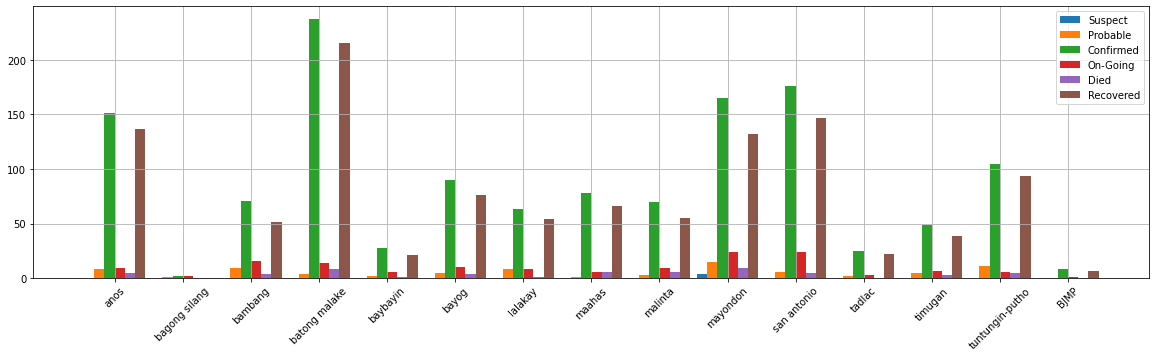

In [3]:
width = 0.15
ind = np.arange(len(df["Barangay"].unique()))
plt.rcParams["figure.figsize"] = (20,5)

plt.bar(ind-width-width,df["Suspect"],width, label="Suspect")
plt.bar(ind-width,df["Probable"],width, label="Probable")
plt.bar(ind,df["Confirmed"],width, label="Confirmed")
plt.bar(ind+width,df["On-Going"],width, label="On-Going")
plt.bar(ind+width+width,df["Died"],width, label="Died")
plt.bar(ind+width+width+width,df["Recovered"],width, label="Recovered")
plt.xticks( ind + width / 2, df["Barangay"], rotation=45)

plt.grid(True)
plt.legend()

In [4]:
cols = list(df.columns)
cols.remove("Barangay")
scaler = preprocessing.MinMaxScaler()
for col in cols:
    scaler.fit(df[[col]])
    df[col] = scaler.transform(df[[col]])

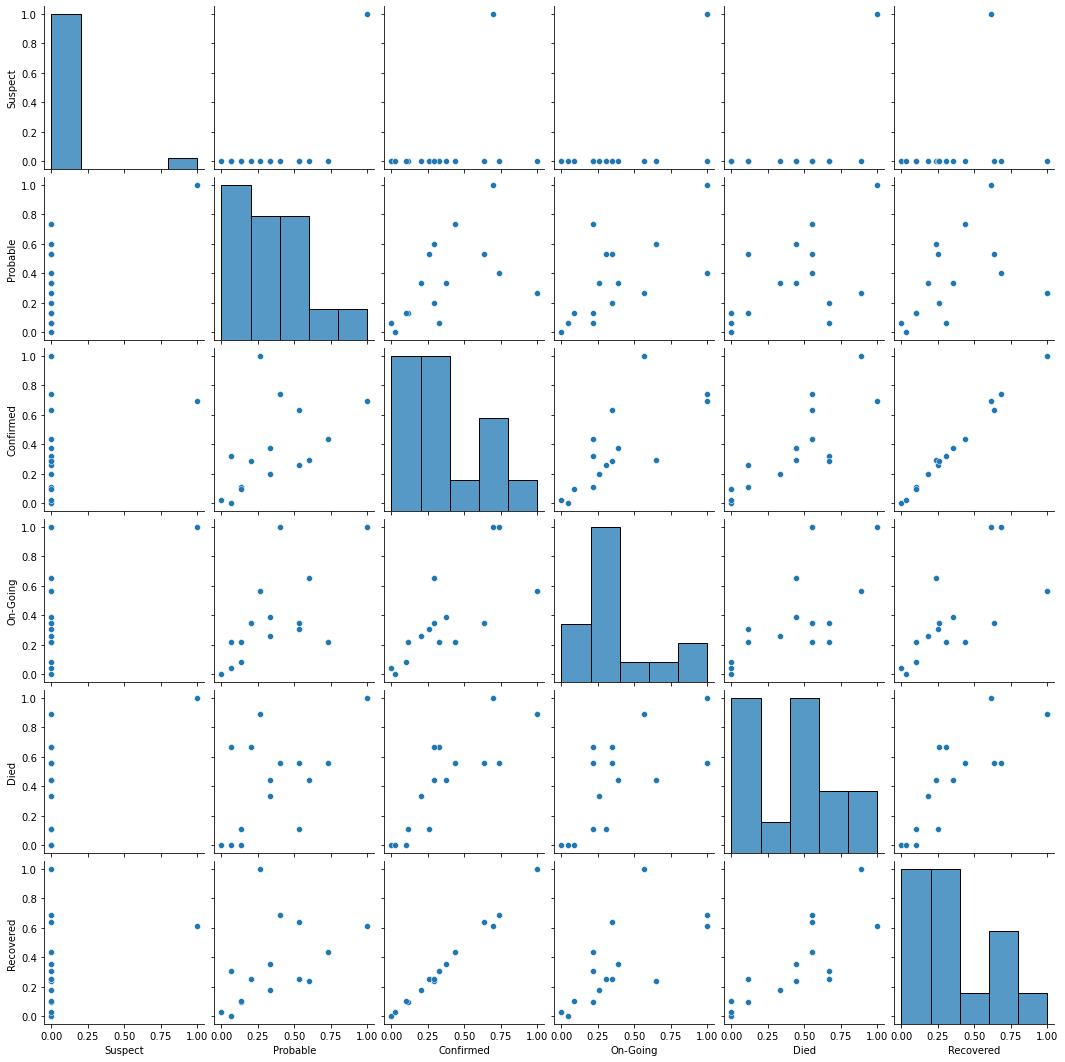

In [5]:
sns.pairplot(df)

In [6]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[cols])
    sse.append(km.inertia_)

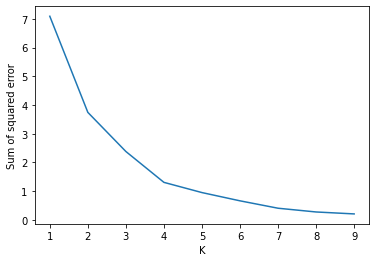

In [7]:
plt.rcParams["figure.figsize"] = (6,4)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [8]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[cols])
y_predicted

array([0, 2, 0, 1, 2, 0, 0, 0, 0, 3, 1, 2, 0, 0, 2])

In [9]:
df['cluster']=y_predicted
df

,Barangay,Suspect,Probable,Confirmed,On-Going,Died,Recovered,cluster
0,anos,0.0,0.533333,0.634043,0.347826,0.555556,0.637209,0
1,bagong silang,0.0,0.066667,0.000000,0.043478,0.000000,0.000000,2
2,bambang,0.0,0.600000,0.293617,0.652174,0.444444,0.237209,0
3,batong malake,0.0,0.266667,1.000000,0.565217,0.888889,1.000000,1
4,baybayin,0.0,0.133333,0.110638,0.217391,0.111111,0.097674,2
5,bayog,0.0,0.333333,0.374468,0.391304,0.444444,0.353488,0
6,lalakay,0.0,0.533333,0.259574,0.304348,0.111111,0.251163,0
7,maahas,0.0,0.066667,0.323404,0.217391,0.666667,0.306977,0
8,malinta,0.0,0.200000,0.289362,0.347826,0.666667,0.255814,0
9,mayondon,1.0,1.000000,0.693617,1.000000,1.000000,0.613953,3


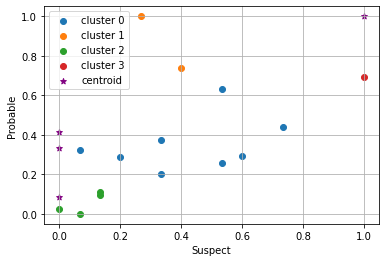

In [10]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]
df4 = df[df["cluster"]==3]
label1="Suspect"
label2="Probable"
label3="Confirmed"
label4="On-Going"
label5="Died"
label6="Recovered"
plt.scatter(df1[label2],df1[label3], label="cluster 0")
plt.scatter(df2[label2],df2[label3], label="cluster 1")
plt.scatter(df3[label2],df3[label3], label="cluster 2")
plt.scatter(df4[label2],df4[label3], label="cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel(label1)
plt.ylabel(label2)
# plt.title('xlabels() function')
plt.grid(True)
  
plt.legend()

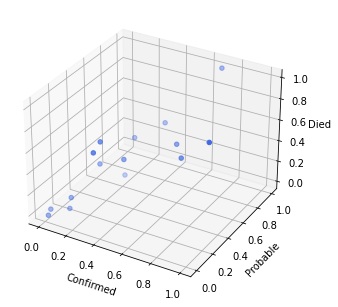

In [11]:
from mpl_toolkits.mplot3d import Axes3D
# define a figure and a 3D axis
fig = plt.figure()
ax = Axes3D(fig)

# define the x, y, & z of our scatter plot, this will just be the data from our data frame.
x = list(df["Confirmed"])
y = list(df["Probable"])
z = list(df["Died"])

# define the axis labels
column_names = df[["Confirmed","Probable","Died"]].columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# define the markers, and the color
ax.scatter(x, y, z, c='royalBlue', marker='o')

plt.show()

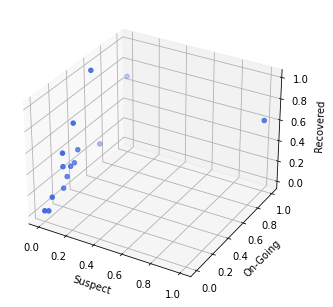

In [12]:
fig = plt.figure()
ax = Axes3D(fig)

# define the x, y, & z of our scatter plot, this will just be the data from our data frame.
x = list(df["Suspect"])
y = list(df["On-Going"])
z = list(df["Recovered"])

column_names = df[["Suspect","On-Going","Recovered"]].columns

ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# define the markers, and the color
ax.scatter(x, y, z, c='royalBlue', marker='o')

plt.show()